<a href="https://colab.research.google.com/github/Alyssasorensen/datasci_7_regressions/blob/main/datasci_7_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HHA 507 Homework Assignment 7 (Regression Analysis)

## Simple Linear Regression

Why I Chose this Dataset:


In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [15]:
from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from statsmodels.stats.diagnostic import het_goldfeldquandt

In [16]:
url = "https://raw.githubusercontent.com/Alyssasorensen/datasci_7_regressions/main/datasets/U.S._Chronic_Disease_Indicators__CDI_%20(2).csv"
df = pd.read_csv(url)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,NaN,Number,...,41,CVD,CVD1_4,NMBR,RACE,AIAN,NaN,NaN,NaN,NaN
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CRDPREV,GENDER,GENF,NaN,NaN,NaN,NaN
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,39,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,59,ALC,ALC1_1,CRDPREV,RACE,ASN,NaN,NaN,NaN,NaN
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,78,ALC,ALC1_1,CRDPREV,GENDER,GENM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,2013,2013,ME,Maine,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,NaN,Number,...,23,COPD,COPD5_3,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
1621,2011,2011,NV,Nevada,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,NaN,%,Crude Prevalence,...,32,DIA,DIA5_0,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN
1622,2015,2015,NV,Nevada,BRFSS,Tobacco,Current smoking among adults aged >= 18 years,NaN,%,Age-adjusted Prevalence,...,32,TOB,TOB1_2,AGEADJPREV,GENDER,GENF,NaN,NaN,NaN,NaN
1623,2012,2012,MI,Michigan,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,NaN,Number,...,26,COPD,COPD5_3,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


### Dependent Variable: DataValue

This variable represents the value of a particular metric or measurement. It can be considered the dependent variable because it's the value that you might want to predict or analyze in relation to other factors.

### Independent Variable: YearStart

YearStart is a numerical variable that represents the starting year of a data record. It can be considered the independent variable in this context because it can be used to analyze how the dependent variable (DataValue) changes over different years.

In [17]:
# Filter the dataset to keep only the relevant columns
df = df[['YearStart', 'DataValue']]

# Drop rows with missing values
df.dropna(inplace=True)

<ipython-input-17-51a84cf669e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [18]:
X = df[['YearStart']]
y = df['DataValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = regressor.predict(X_test)
y_pred

array([3654.2975815 , 3654.2975815 , 3997.42533497, 3722.92313219,
       3722.92313219, 3757.23590754, 3688.61035684, 3757.23590754,
       3688.61035684, 3825.86145823, 3619.98480615, 3585.6720308 ,
       3825.86145823, 3860.17423358, 3654.2975815 , 3791.54868289,
       3722.92313219, 3963.11255962, 3791.54868289, 3757.23590754,
       3688.61035684, 3860.17423358, 3757.23590754, 3963.11255962,
       3825.86145823, 3654.2975815 , 3963.11255962, 3757.23590754,
       3722.92313219, 3722.92313219, 3757.23590754, 3585.6720308 ,
       3997.42533497, 3963.11255962, 3654.2975815 , 3757.23590754,
       3825.86145823, 3619.98480615, 3722.92313219, 3688.61035684,
       3619.98480615, 3654.2975815 , 3688.61035684, 3654.2975815 ,
       3791.54868289, 3825.86145823, 3791.54868289, 3688.61035684,
       3619.98480615, 3757.23590754, 3688.61035684, 3654.2975815 ,
       3757.23590754, 3825.86145823, 3722.92313219, 3654.2975815 ,
       3722.92313219, 3688.61035684, 3688.61035684, 3791.54868

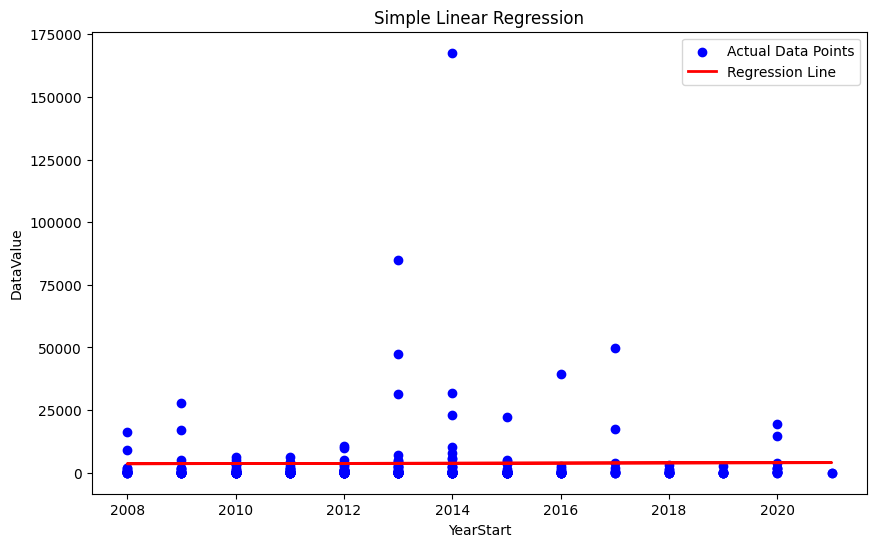

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('YearStart')
plt.ylabel('DataValue')
plt.legend()
plt.show()

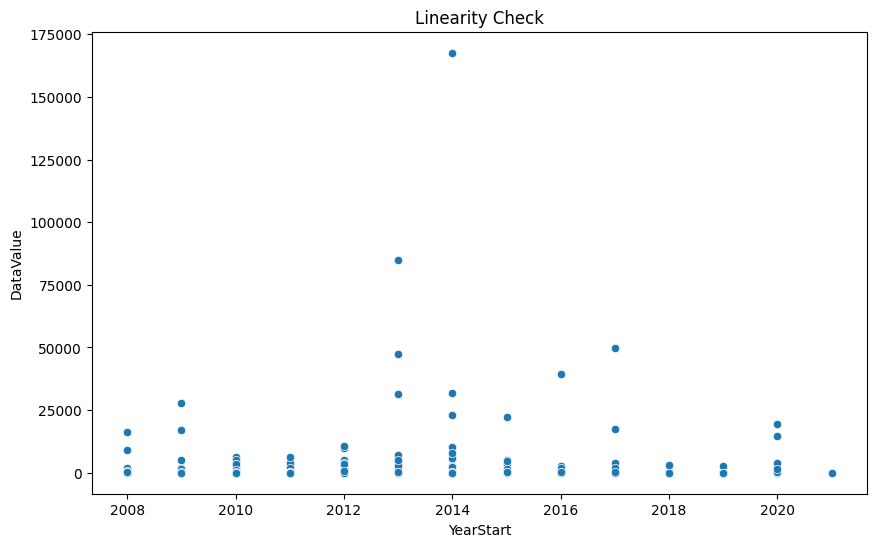

In [26]:
# Check linearity (scatterplot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['YearStart'], y=y_test)
plt.title('Linearity Check')
plt.xlabel('YearStart')
plt.ylabel('DataValue')
plt.show()

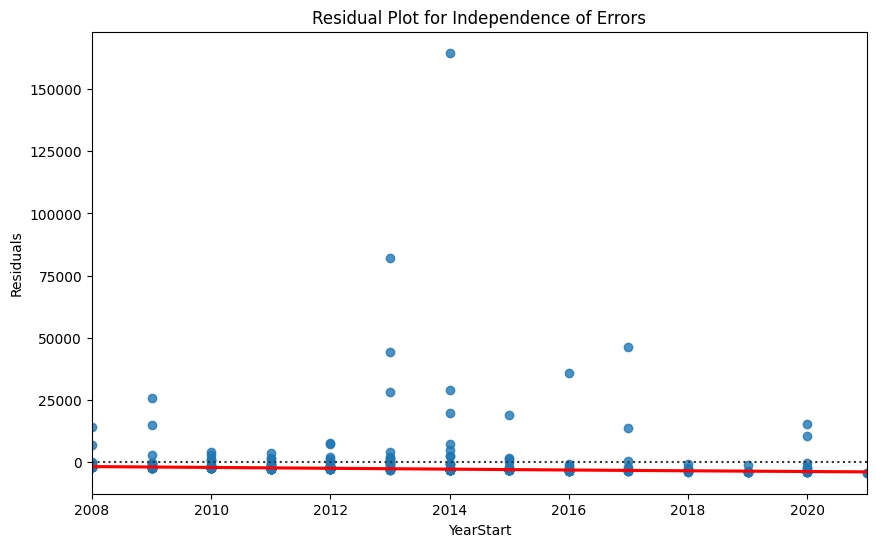

In [30]:
# Check independence of errors (residual plot)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=X_test['YearStart'], y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title('Residual Plot for Independence of Errors')
plt.xlabel('YearStart')
plt.ylabel('Residuals')
plt.show()

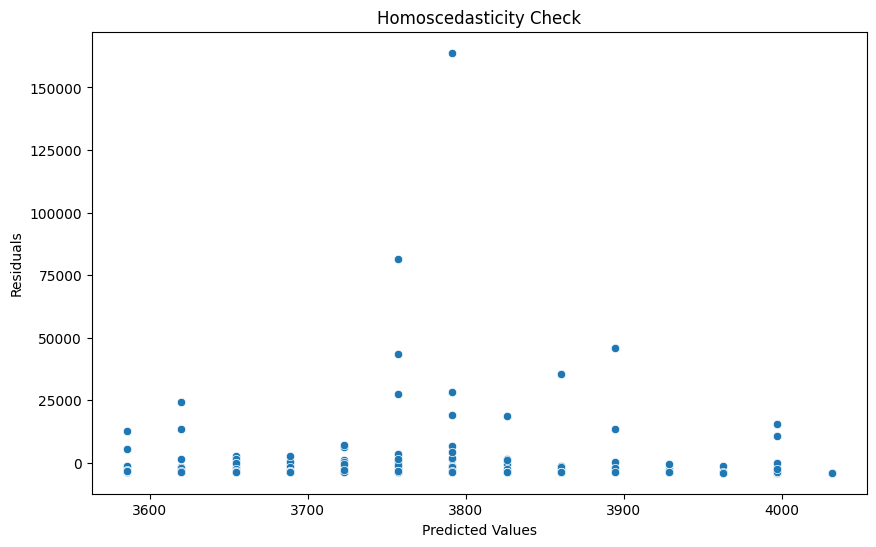

In [28]:
# Check constant variance (homoscedasticity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

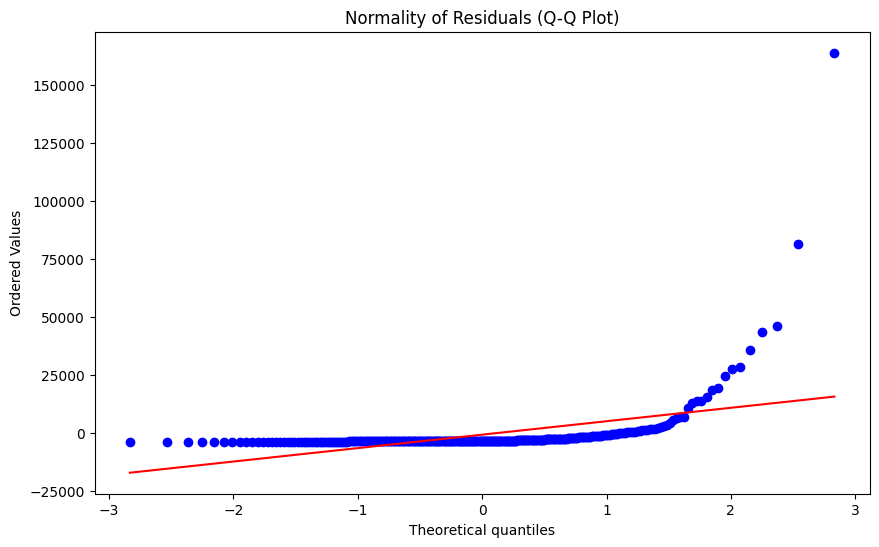

In [29]:
# Check normality of errors (Q-Q plot)
import scipy.stats as stats
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality of Residuals (Q-Q Plot)')
plt.show()

## Multiple Linear Regression

Why I Chose this Dataset:

In [84]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
url = "https://raw.githubusercontent.com/Alyssasorensen/datasci_7_regressions/main/datasets/Cancer_Rates%20(1).csv"
df = pd.read_csv(url)
df

,FID,ZIP,Colorectal,Lung_Bronc,Breast_Can,Prostate_C,Urinary_Sy,All_Cancer,SHAPE_Length,SHAPE_Area
0,1,60002,218.062127,419.666735,399.094836,259.205925,259.205925,2703.147501,215525.15520,1.149062e+09
1,2,60010,258.915706,335.464697,504.322767,499.819885,227.395533,3248.829251,178637.10960,8.027354e+08
2,3,60015,153.435868,230.153801,478.573777,442.041428,222.847331,2922.587952,111400.89060,3.674576e+08
3,4,60020,292.797189,507.515128,214.717939,302.557096,370.876440,3084.130392,92363.08463,1.666177e+08
4,5,60030,221.535432,284.440555,404.780789,322.730629,210.595411,2581.845035,247258.22470,8.455179e+08
5,6,60031,163.502110,221.518987,414.029536,303.270042,160.864979,2217.827004,163995.18160,5.271176e+08
6,7,60035,241.311124,475.919161,553.004659,482.622248,392.130576,3760.431679,115796.72380,3.457929e+08
7,8,60040,55.555556,240.740741,277.777778,185.185185,185.185185,1796.296296,25907.37247,1.780943e+07
8,9,60042,140.252454,315.568022,397.381954,187.003273,187.003273,2267.414680,45385.39523,4.517757e+07
9,10,60044,206.547558,237.529691,557.678406,413.095115,165.238046,3149.850253,92539.70873,2.127777e+08


## Dependent Variable (Y):

Dependent Variable: All_Cancer

## Independent Variables (X):

Independent Variable 1: Colorectal
Independent Variable 2: Lung_Bronc
Independent Variable 3: Breast_Can
Independent Variable 4: Prostate_C
Independent Variable 5: Urinary_Sy

In [86]:
# Define the dependent variable (Y) and independent variables (X)
Y = df['All_Cancer']
X = df[['Colorectal', 'Lung_Bronc', 'Breast_Can', 'Prostate_C', 'Urinary_Sy']]

In [87]:
# Add a constant term (intercept) to the model
X = sm.add_constant(X)

In [88]:
# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

In [89]:
# Get the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             All_Cancer   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.13e-15
Time:                        21:20:45   Log-Likelihood:                -165.89
No. Observations:                  27   AIC:                             343.8
Df Residuals:                      21   BIC:                             351.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        126.2003    101.656      1.241      0.2

## Checking Assumptions

In [90]:
# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [91]:
# Print the VIF data
print("\nVIF Data:")
print(vif_data)


VIF Data:
     Variable        VIF
0       const  17.071047
1  Colorectal   3.098965
2  Lung_Bronc   5.131104
3  Breast_Can   2.754088
4  Prostate_C   3.697852
5  Urinary_Sy   4.272061


## Results Interpreted:

Constant (Intercept) VIF = 17.071047

The constant term, or intercept, typically has a high VIF because it is not related to any other variable in the model. You can ignore its VIF value.

Colorectal, VIF = 3.098965:

The VIF of Colorectal is relatively low (below 5), suggesting that it has little multicollinearity with the other variables in the model.

Lung_Bronc, VIF = 5.131104:

The VIF of Lung_Bronc is moderate (around 5), indicating some degree of multicollinearity with other variables but not extremely high.

Breast_Can, VIF = 2.754088:

The VIF of Breast_Can is low (below 5), indicating little multicollinearity with other variables.

Prostate_C, VIF = 3.697852:

The VIF of Prostate_C is relatively low (below 5), suggesting limited multicollinearity.

Urinary_Sy, VIF = 4.272061:

The VIF of Urinary_Sy is moderate (around 4), indicating some multicollinearity but not extremely high.

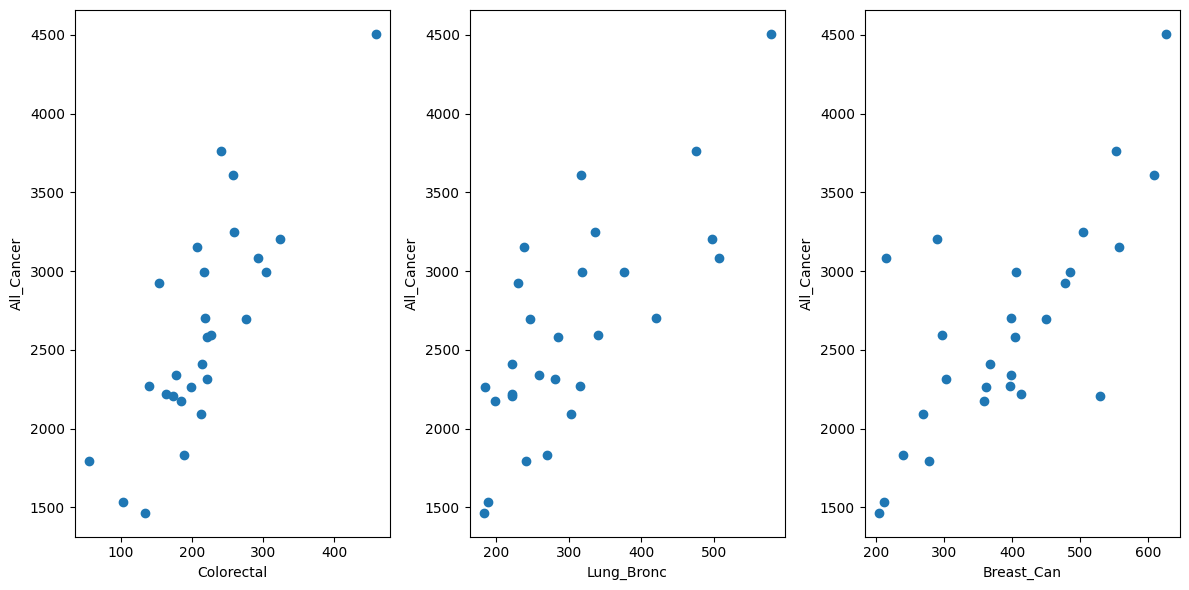

In [95]:
# Define the independent variables (e.g., X1, X2, X3)
X1 = df['Colorectal']
X2 = df['Lung_Bronc']
X3 = df['Breast_Can']

# Define the dependent variable (Y)
Y = df['All_Cancer']

# Create scatterplots
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.scatter(X1, Y)
plt.xlabel('Colorectal')
plt.ylabel('All_Cancer')

plt.subplot(132)
plt.scatter(X2, Y)
plt.xlabel('Lung_Bronc')
plt.ylabel('All_Cancer')

plt.subplot(133)
plt.scatter(X3, Y)
plt.xlabel('Breast_Can')
plt.ylabel('All_Cancer')

plt.tight_layout()
plt.show()

<ipython-input-100-a1f28787ae53>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red', label='Ideal Line')


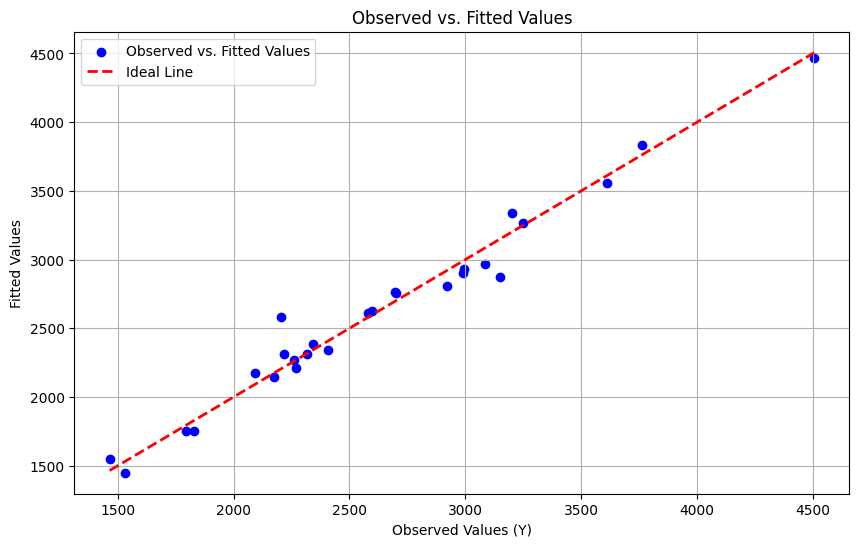

In [100]:
# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Get the fitted values (predicted values) from the model
fitted_values = model.fittedvalues

# Create a scatterplot of observed vs. fitted values
plt.figure(figsize=(10, 6))
plt.scatter(Y, fitted_values, c='blue', label='Observed vs. Fitted Values')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Observed Values (Y)')
plt.ylabel('Fitted Values')
plt.title('Observed vs. Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

In [101]:
## Assessing normality of the residuals
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.22752827405929565, p-value=2.279915741799967e-33


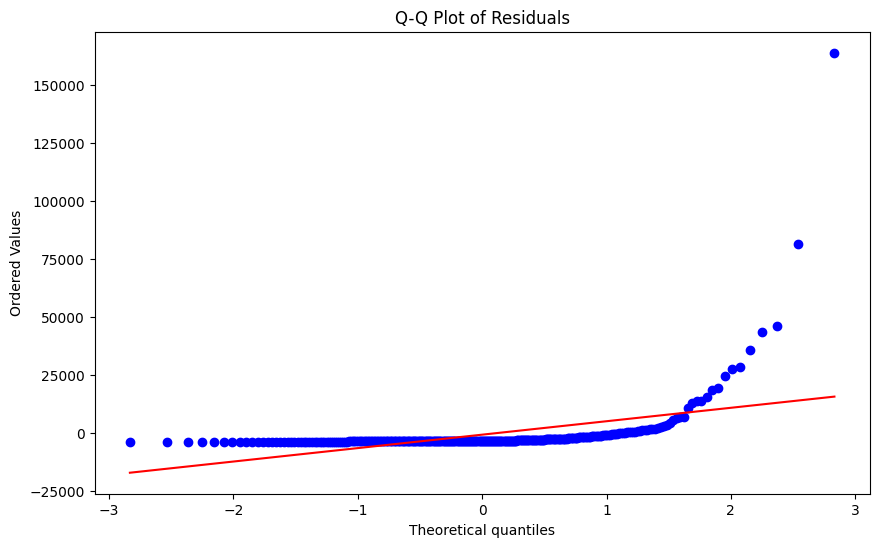

In [102]:
# Plot Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

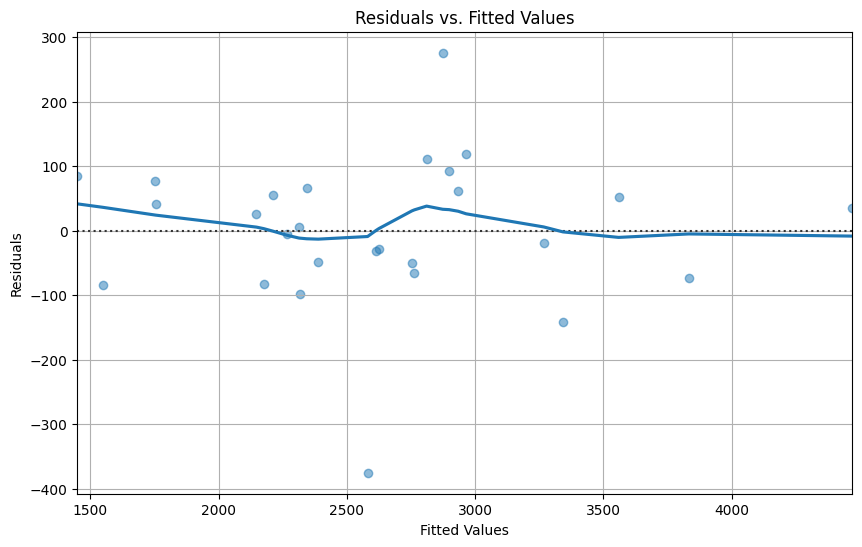

In [104]:
## Assessing the homogeneity of variance of the residuals

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create a Residuals vs. Fitted Values plot
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

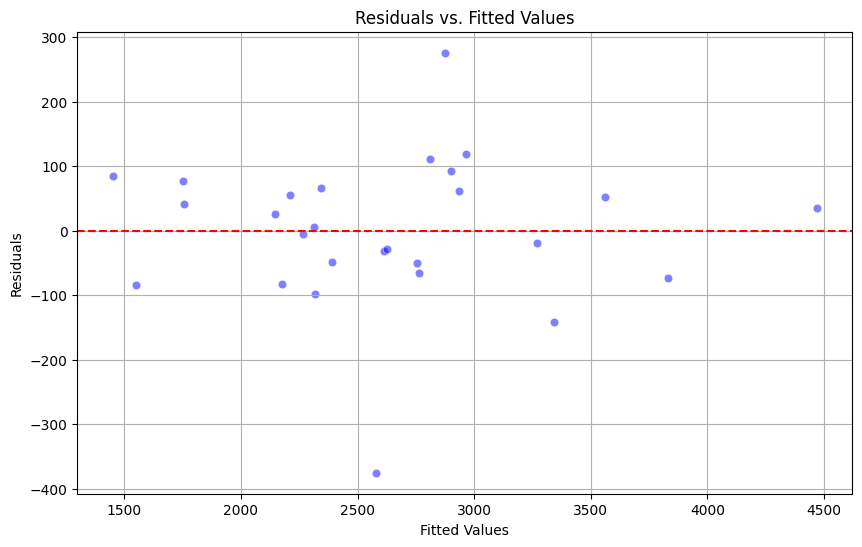

In [106]:
# Plot residuals vs fitted values

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Get the residuals from the model
residuals = model.resid

# Create a Residuals vs. Fitted Values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

## Model Evaluation